<a href="https://colab.research.google.com/github/ihsan292292/Settyl/blob/main/settyl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import requests
import pandas as pd

In [ ]:
file_path = "https://gist.githubusercontent.com/farhaan-settyl/ecf9c1e7ab7374f18e4400b7a3d2a161/raw/f94652f217eeca83e36dab9d08727caf79ebdecf/dataset.json"

In [ ]:
response = requests.get(file_path)
json_data = response.json()

In [ ]:
unique_labels = set()
for entry in json_data:
  unique_labels.add(entry["internalStatus"])


In [ ]:
unique_labels

{'Arrival',
 'Departure',
 'Empty Container Released',
 'Empty Return',
 'Gate In',
 'Gate Out',
 'In-transit',
 'Inbound Terminal',
 'Loaded on Vessel',
 'Off Rail',
 'On Rail',
 'Outbound Terminal',
 'Port In',
 'Port Out',
 'Unloaded on Vessel'}

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
label_counts = {}
for entry in json_data:
    label = entry["internalStatus"]
    label_counts[label] = label_counts.get(label, 0) + 1

In [ ]:
labels = list(label_counts.keys())
counts = list(label_counts.values())

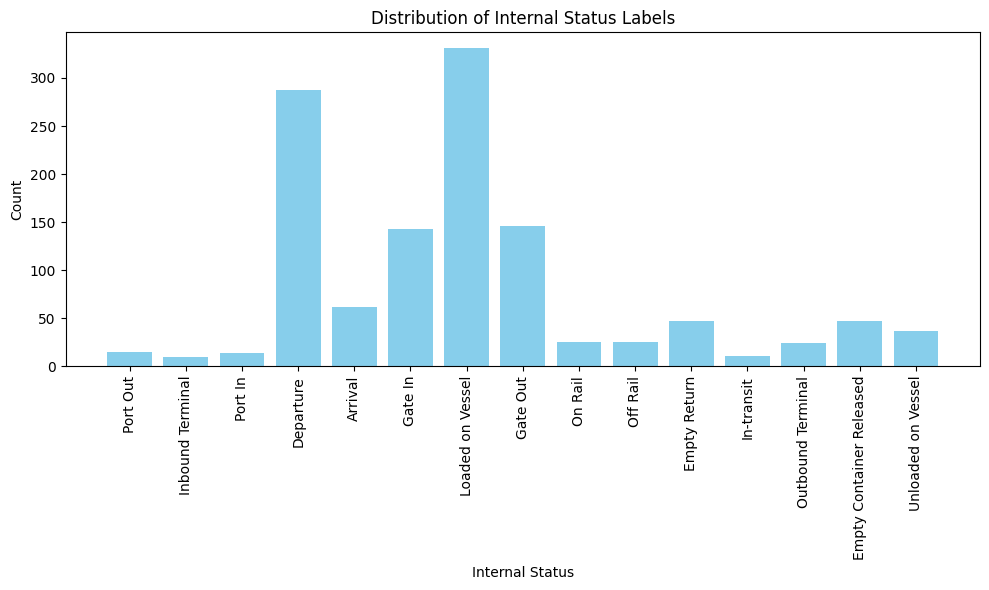

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Internal Status')
plt.ylabel('Count')
plt.title('Distribution of Internal Status Labels')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_json(file_path)
df

,externalStatus,internalStatus
0,PORT OUT,Port Out
1,TERMINAL IN,Inbound Terminal
2,PORT IN,Port In
3,Vessel departure from first POL (Vessel name :...,Departure
4,Vessel arrival at final POD (Vessel name : TIA...,Arrival
...,...,...
1217,Import Loaded on Rail,Loaded on Vessel
1218,Full Transshipment Loaded,Loaded on Vessel
1219,Full Transshipment Loaded,Loaded on Vessel
1220,Export Loaded on Vessel,Loaded on Vessel


# Exploring Data

In [ ]:
df['internalStatus'].value_counts()

Loaded on Vessel            331
Departure                   287
Gate Out                    146
Gate In                     143
Arrival                      62
Empty Return                 47
Empty Container Released     47
Unloaded on Vessel           37
On Rail                      25
Off Rail                     25
Outbound Terminal            24
Port Out                     15
Port In                      14
In-transit                   10
Inbound Terminal              9
Name: internalStatus, dtype: int64

In [ ]:
df[df['internalStatus'] == 'Departure']['externalStatus'].value_counts()

Discharge                                                           141
Actual time of departure                                             50
DEPARTCU                                                             43
Expected time of departure                                           20
'MARINA ONE 001S' Departure from Port of Loading MARINA ONE 001S      9
Vessel Departure (Vessel name : VAYENGA MAERSK)                       7
Export Rail Departure                                                 6
Vessel Departure                                                      3
Vessel departure from first POL (Vessel name : TIAN FU HE)            1
Discharge (Vessel name : MSC ORION)                                   1
'YM PLUM 175W' Departure from Port of Loading YM PLUM 175W            1
'TUCAPEL 008E' Departure from Port of Loading TUCAPEL 008E            1
Discharge (Vessel name : COSCO INDONESIA)                             1
Discharge (Vessel name : MAERSK BULAN)                          

In [ ]:
df[df['internalStatus'] == 'Loaded on Vessel']['externalStatus'].value_counts()

Load on MAERSK SEMBAWANG / 237E                                   42
Load on MSC SVEVA / 248E                                          39
Full Transshipment Loaded                                         37
Loaded at First POL                                               30
Loaded at T/S POL                                                 30
Export Loaded on Vessel                                           23
Import Loaded on Rail                                             18
Load on MSC ORION / 227N                                          15
Loaded on 'MARINA ONE 001S' at Port of Loading MARINA ONE 001S     9
Loaded on Board                                                    8
Loaded on Train                                                    8
Loaded on board (Vessel name : VAYENGA MAERSK)                     7
Export Loaded on Rail                                              6
Load on MAERSK GUATEMALA / 247E                                    3
Loaded on board                   

In [ ]:
df[df['internalStatus'] == 'Gate Out']['externalStatus'].value_counts()

Gate out    144
GATE OUT      2
Name: externalStatus, dtype: int64

In [ ]:
df[df['internalStatus'] == 'Gate In']['externalStatus'].value_counts()

Gate in    143
Name: externalStatus, dtype: int64

In [ ]:
df[df['internalStatus'] == 'Arrival']['externalStatus'].value_counts()

'MARINA ONE 001S' Arrival at Port of Discharging MARINA ONE 001S    9
Expected Arrival Update                                             8
Rail Arrival in-Transit                                             8
Expected Arrival at Dest. Ramp                                      8
Expected Arrival Place of Delivery                                  8
Vessel Arrival (Vessel name : VAYENGA MAERSK)                       7
Vessel Arrival                                                      4
Estimated Time of Arrival                                           4
Train arrival for export                                            2
Vessel arrival at final POD (Vessel name : TIAN FU HE)              1
'YM PLUM 175W' Arrival at Port of Discharging YM PLUM 175W          1
Empty Container Door Arrival                                        1
'TUCAPEL 008E' Arrival at Port of Discharging TUCAPEL 008E          1
Name: externalStatus, dtype: int64

In [ ]:
df[df['internalStatus'] == 'Empty Return']['externalStatus'].value_counts()

Gate out, Empty                           36
Empty Container Returned from Customer    11
Name: externalStatus, dtype: int64

In [ ]:
df[df['internalStatus'] == 'Empty Container Released']['externalStatus'].value_counts()

Empty to Shipper                      25
Empty Container Release to Shipper    11
Empty to shipper                      11
Name: externalStatus, dtype: int64

In [ ]:
df[df['internalStatus'] == 'On Rail']['externalStatus'].value_counts()

On rail    25
Name: externalStatus, dtype: int64

In [ ]:
df[df['internalStatus'] == 'Off Rail']['externalStatus'].value_counts()

Off rail    25
Name: externalStatus, dtype: int64

In [ ]:
df[df['internalStatus'] == 'Outbound Terminal']['externalStatus'].value_counts()

Gate In to Outbound Terminal    11
CFS OUT                          6
Gate In to Outbound CY           1
Outbound Rail Loading            1
Outbound Rail Departure          1
Outbound Rail Arrival            1
Outbound Rail Unloading          1
Gate Out from Outbound CY        1
TERMINAL OUT                     1
Name: externalStatus, dtype: int64

In [ ]:
df[df['internalStatus'] == 'Port Out']['externalStatus'].value_counts()

PORT OUT    15
Name: externalStatus, dtype: int64

In [ ]:
df[df['internalStatus'] == 'Port In']['externalStatus'].value_counts()

PORT IN    14
Name: externalStatus, dtype: int64

In [ ]:
df[df['internalStatus'] == 'In-transit']['externalStatus'].value_counts()

TOLL PLAZA CROSSED    10
Name: externalStatus, dtype: int64

In [ ]:
df[df['internalStatus'] == 'Inbound Terminal']['externalStatus'].value_counts()

CFS IN         7
TERMINAL IN    2
Name: externalStatus, dtype: int64

In [ ]:
'''from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

tokenized_sentences = [word_tokenize(sentence) for sentence in df['externalStatus_clean']]
model = Word2Vec(sentences=tokenized_sentences, vector_size=20, window=5, min_count=1, workers=4)
sentence_vectors = [model.wv.get_vector(word) for sentence in tokenized_sentences for word in sentence]'''

"from gensim.models import Word2Vec\nfrom nltk.tokenize import word_tokenize\n\ntokenized_sentences = [word_tokenize(sentence) for sentence in df['externalStatus_clean']]\nmodel = Word2Vec(sentences=tokenized_sentences, vector_size=20, window=5, min_count=1, workers=4)\nsentence_vectors = [model.wv.get_vector(word) for sentence in tokenized_sentences for word in sentence]"

# Cleaning Text

In [ ]:
import string
import re

def clean_text(input_string):
    # Regex that replaces punctuation with a blank space or empty string
    pattern = r'[{}]'.format(re.escape(string.punctuation))
    output_string = re.sub(pattern, ' ', input_string)
    return output_string.lower()

df['externalStatus_clean'] = df['externalStatus'].apply(clean_text)

# Model Building

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
tokenizer = Tokenizer(oov_token="<UNK>", lower=True)
tokenizer.fit_on_texts(df['externalStatus_clean'])
sequences = tokenizer.texts_to_sequences(df['externalStatus_clean'])
maxlen = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, truncating="post", padding="post", maxlen=maxlen)

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(padded_sequences, df['internalStatus'])

In [ ]:
X_res.shape, y_res.shape

((4965, 12), (4965,))

In [ ]:
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_res.to_frame())
X_train, X_test, y_train, y_test = train_test_split(X_res, y, train_size=0.8, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

In [ ]:
model = Sequential()
model.add(Embedding(200, 16, input_length=maxlen))
model.add(Bidirectional(LSTM(8, return_sequences=True)))
model.add(Bidirectional(LSTM(8)))
model.add(Dense(15, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 12, 16)            3200      
                                                                 
 bidirectional (Bidirection  (None, 12, 16)            1600      
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 16)                1600      
 onal)                                                           
                                                                 
 dense (Dense)               (None, 15)                255       
                                                                 
Total params: 6655 (26.00 KB)
Trainable params: 6655 (26.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=12)

Epoch 1/12
125/125 [==============================] - 25s 39ms/step - loss: 2.5600 - accuracy: 0.2137 - val_loss: 2.0058 - val_accuracy: 0.3817
Epoch 2/12
125/125 [==============================] - 2s 19ms/step - loss: 1.2971 - accuracy: 0.7752 - val_loss: 0.7826 - val_accuracy: 0.9436
Epoch 3/12
125/125 [==============================] - 3s 26ms/step - loss: 0.5603 - accuracy: 0.9567 - val_loss: 0.4109 - val_accuracy: 0.9557
Epoch 4/12
125/125 [==============================] - 3s 20ms/step - loss: 0.3169 - accuracy: 0.9826 - val_loss: 0.2691 - val_accuracy: 0.9839
Epoch 5/12
125/125 [==============================] - 2s 18ms/step - loss: 0.2213 - accuracy: 0.9872 - val_loss: 0.2030 - val_accuracy: 0.9849
Epoch 6/12
125/125 [==============================] - 2s 17ms/step - loss: 0.1525 - accuracy: 0.9907 - val_loss: 0.1440 - val_accuracy: 0.9869
Epoch 7/12
125/125 [==============================] - 2s 17ms/step - loss: 0.1148 - accuracy: 0.9937 - val_loss: 0.1193 - val_accuracy: 0.987

In [ ]:
def predict_outcome(text):
    input_sequence = tokenizer.texts_to_sequences([clean_text(text)])
    padded_input_sequence = pad_sequences(input_sequence, truncating="post", padding="post", maxlen=maxlen) if len(input_sequence[0]) <= maxlen else pad_sequences([list(filter(lambda x: x != 1, input_sequence[0]))], truncating="post", padding="post", maxlen=maxlen)
    pred_index = model.predict(padded_input_sequence, verbose=0)[0].argmax()
    return encoder.categories_[0][pred_index]

In [ ]:
df['predictedInternalStatus'] = df['externalStatus'].apply(predict_outcome)

In [ ]:
df

,externalStatus,internalStatus,externalStatus_clean,predictedInternalStatus
0,PORT OUT,Port Out,port out,Port Out
1,TERMINAL IN,Inbound Terminal,terminal in,Inbound Terminal
2,PORT IN,Port In,port in,Port In
3,Vessel departure from first POL (Vessel name :...,Departure,vessel departure from first pol vessel name ...,Departure
4,Vessel arrival at final POD (Vessel name : TIA...,Arrival,vessel arrival at final pod vessel name tia...,Arrival
...,...,...,...,...
1217,Import Loaded on Rail,Loaded on Vessel,import loaded on rail,Loaded on Vessel
1218,Full Transshipment Loaded,Loaded on Vessel,full transshipment loaded,Loaded on Vessel
1219,Full Transshipment Loaded,Loaded on Vessel,full transshipment loaded,Loaded on Vessel
1220,Export Loaded on Vessel,Loaded on Vessel,export loaded on vessel,Loaded on Vessel


In [ ]:
(df['internalStatus'] == df['predictedInternalStatus']).value_counts()

True     1218
False       4
dtype: int64

# Final Model training and exporting

In [ ]:
import pickle

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
f.close()

with open("encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)
f.close()

model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Deployment

In [ ]:
from keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

In [ ]:
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)
f.close()

with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)
f.close()

saved_model = load_model("model.h5")

In [ ]:
def predict_outcome(text):
    input_sequence = tokenizer.texts_to_sequences([clean_text(text)])
    padded_input_sequence = pad_sequences(input_sequence, truncating="post", padding="post", maxlen=maxlen) if len(input_sequence[0]) <= maxlen else pad_sequences([list(filter(lambda x: x != 1, input_sequence[0]))], truncating="post", padding="post", maxlen=maxlen)
    pred_index = model.predict(padded_input_sequence, verbose=0)[0].argmax()
    return encoder.categories_[0][pred_index]

In [ ]:
predict_outcome("Terminal came in")

'Outbound Terminal'